# Визуализация данных с Matplotlib и Seaborn
## Подключение библиотек и скриптов

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Считываем датасет
df = pd.read_csv('bank.csv', sep=';')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,convert
3103,29,blue-collar,married,secondary,no,424,yes,yes,unknown,14,may,241,2,-1,0
4045,47,blue-collar,married,unknown,no,584,yes,no,unknown,19,may,79,19,-1,0
44790,21,student,single,unknown,no,1506,no,no,cellular,14,sep,340,1,-1,1
41240,28,blue-collar,married,secondary,no,61,yes,no,cellular,21,aug,744,1,109,1
35691,31,technician,single,secondary,no,691,yes,no,cellular,8,may,198,1,-1,0
31805,46,blue-collar,married,primary,no,1204,yes,no,cellular,8,apr,139,2,-1,0
24411,59,management,married,primary,no,252,yes,yes,cellular,17,nov,138,1,175,0
19914,50,blue-collar,married,secondary,no,0,no,no,cellular,8,aug,192,2,-1,0
25109,32,technician,single,secondary,no,28,yes,no,cellular,18,nov,368,1,-1,0
25288,36,technician,divorced,secondary,no,556,yes,no,cellular,18,nov,154,3,189,0


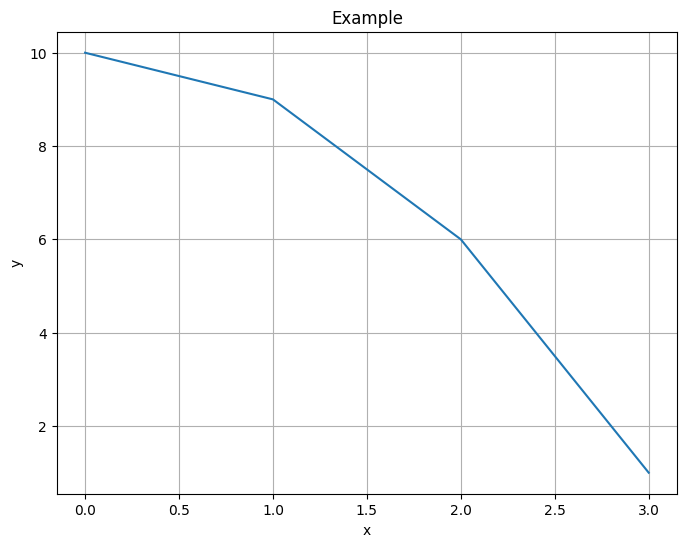

In [4]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

# Виды графиков
## Линейный график

In [5]:
# Готовим данные для графика в виде сводной таблицы

data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data.head()

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403


## Matplotlib

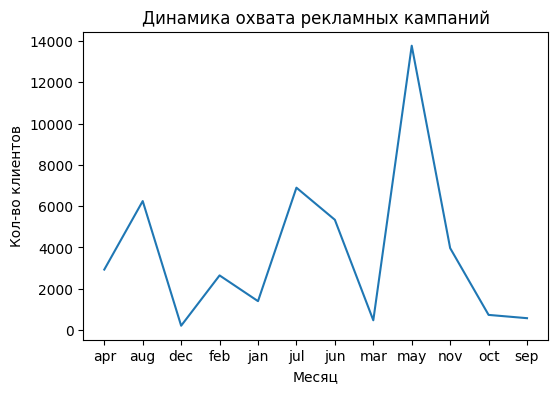

In [6]:
plt.figure(figsize=(6, 4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

## Seaborn

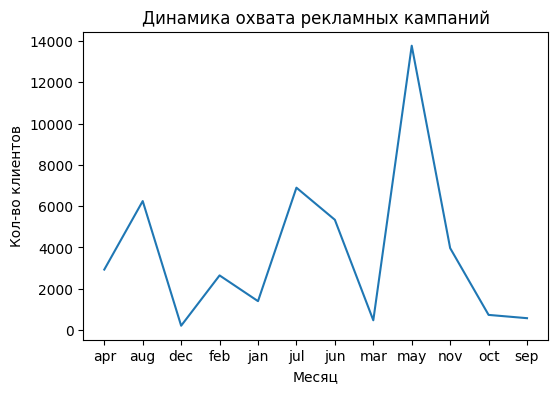

In [7]:
plt.figure(figsize=(6, 4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

# Гистограмма
## Matplotlib

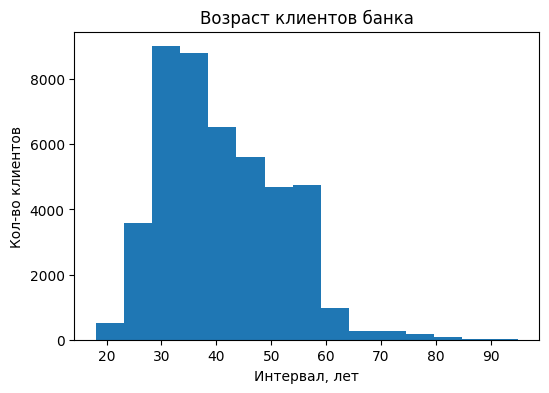

In [9]:
plt.figure(figsize=(6, 4))

plt.hist(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

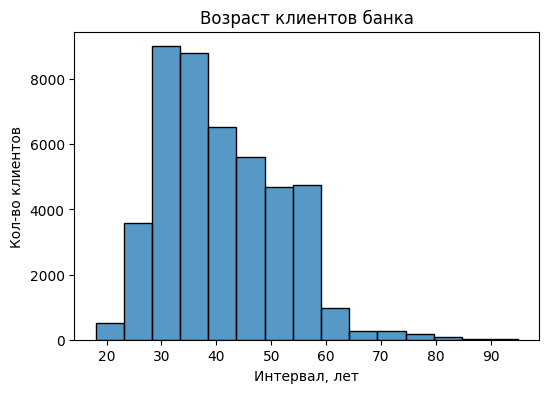

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов');

# Диаграмма рассеяния

In [11]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


# Matplotlib

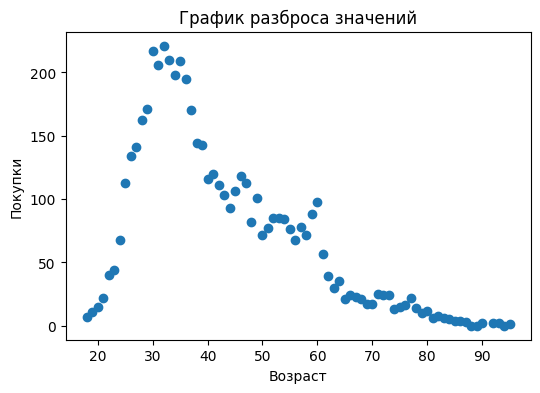

In [12]:
plt.figure(figsize=(6, 4))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

# Seaborn

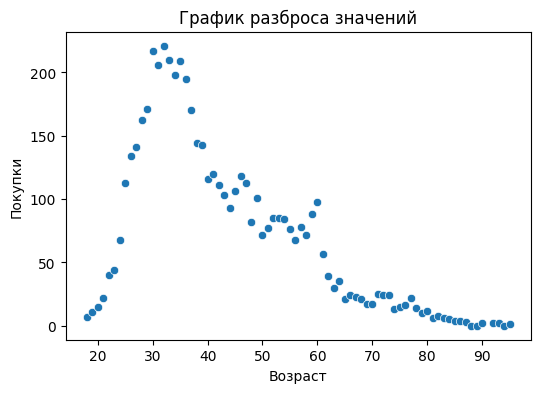

In [13]:
plt.figure(figsize=(6, 4))

sns.scatterplot(x=data['age'], y=data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

# Столбчатые диаграммы


In [16]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,job,count
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


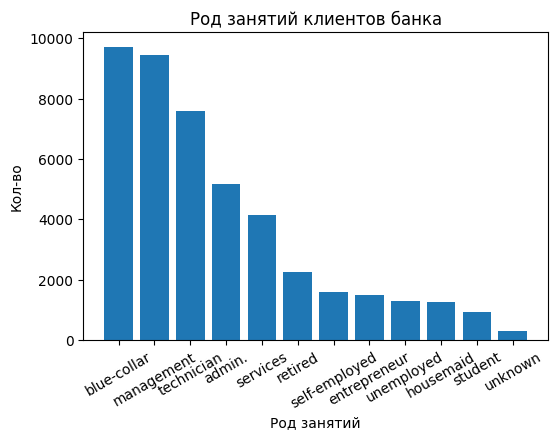

In [17]:
plt.figure(figsize=(6, 4))

plt.bar(data['job'], data['count'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

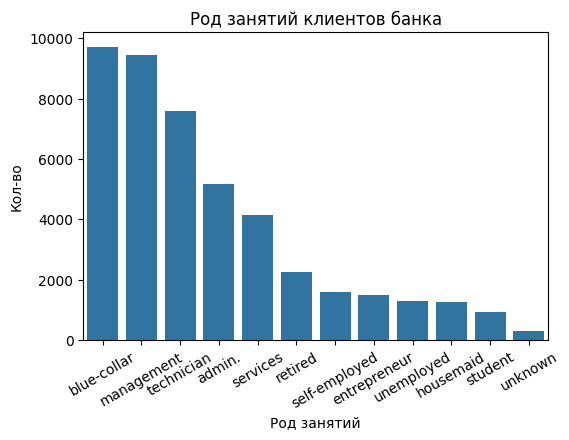

In [19]:
plt.figure(figsize=(6, 4))

sns.barplot(x=data['job'], y=data['count'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

# Многорядовые столбчатые диаграммы

In [20]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


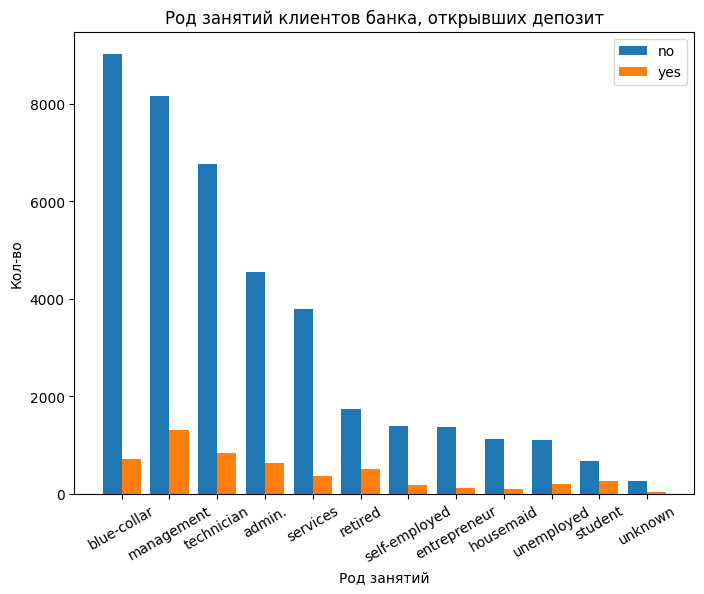

In [21]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

# Сложенная столбчатая диаграмма

In [22]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert'], normalize='index').reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

convert,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


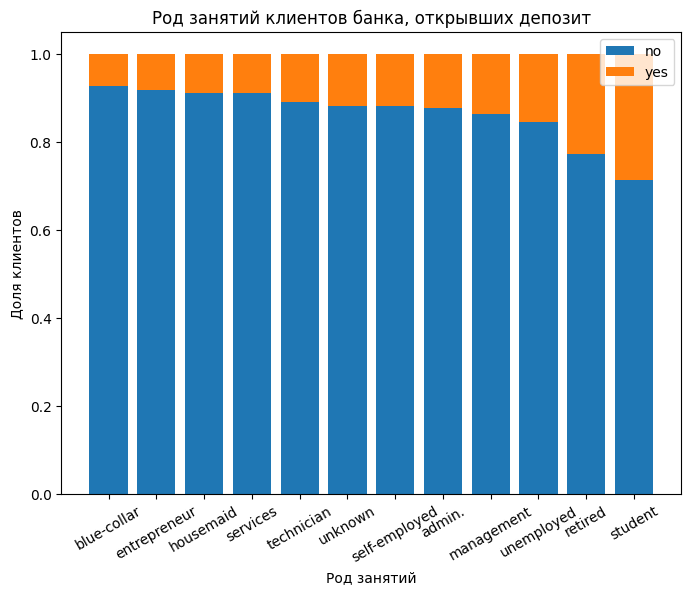

In [23]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize=(8, 6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30);

# Ящики с усами

In [24]:
# Готовим данные для графика
data1 = df['duration'][df['convert'] == 1]
data2 = df['duration'][df['convert'] == 0]
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

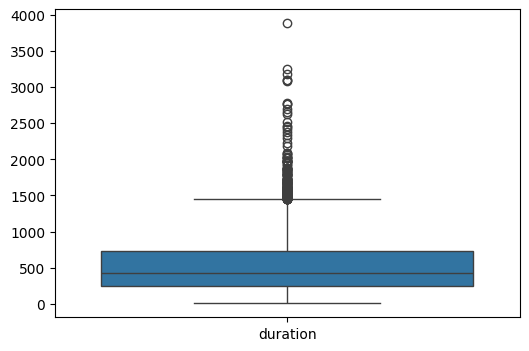

In [25]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1]);

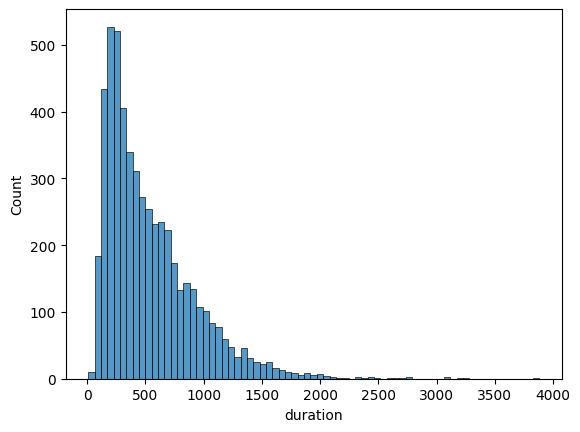

In [26]:
sns.histplot(x=data1);

## Matplotlib

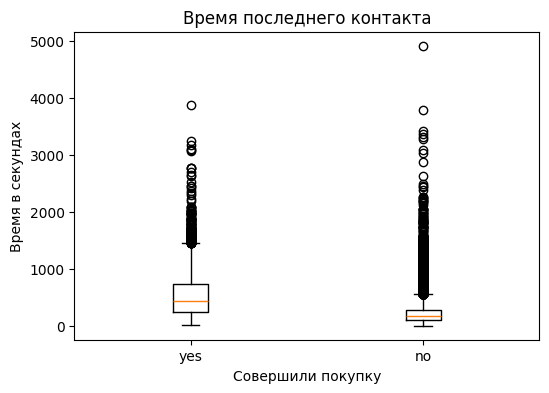

In [27]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

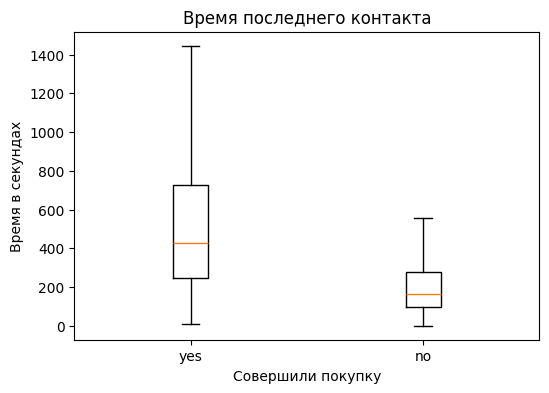

In [28]:
# Строим боксплот без выбросов 

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2], showfliers=False) # showfliers=False убрать выбросы

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no']);

## Seaborn

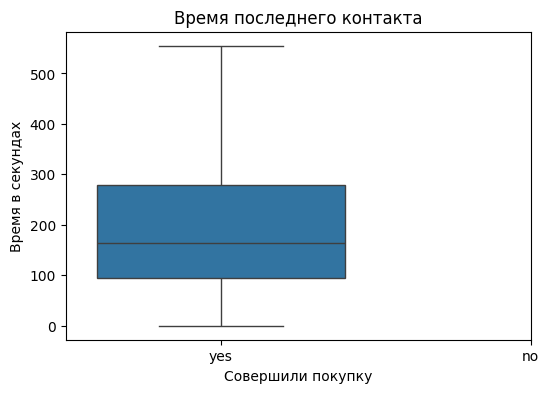

In [29]:

plt.figure(figsize=(6, 4))

sns.boxplot(data=[data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([0, 1], ['yes', 'no']);

# Круговая диаграмма

In [30]:
# Готовим данные для графика
data = df['convert'].value_counts()
data.index = ['no', 'yes']
data.head()

no     39922
yes     5289
Name: count, dtype: int64

## Matplotlib

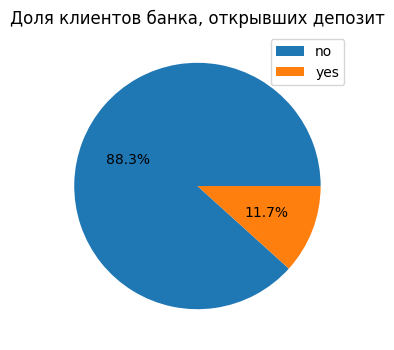

In [31]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

# Визуальный анализ данных
## Описание датасета

### Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

longitude - долгота
latitude - широта
housing_median_age - средний возраст дома
total_rooms - общее количество комнат
total_bedrooms - общее количество спален
population - количество проживающих
households - домохозяйства
ocean_proximity - близость океана
median_income - средний доход
median_house_value - средняя стоимость дома

In [34]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Распределение вещественных признаков

{'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
[0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

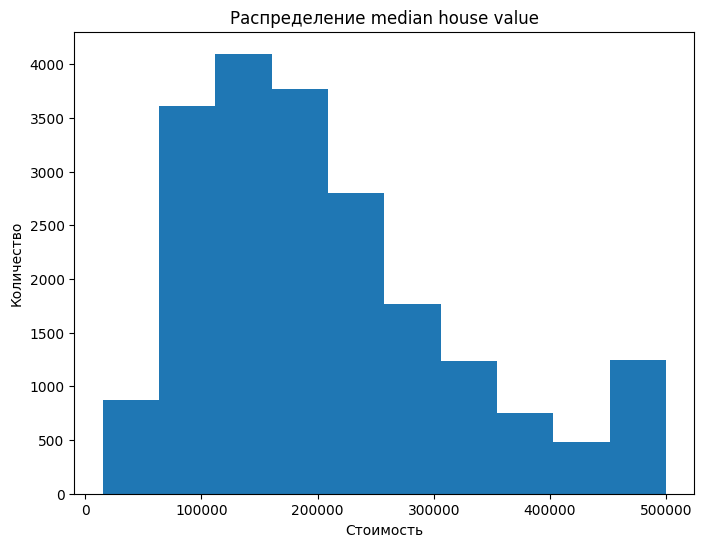

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'])
plt.title('Распределение median house value')
plt.xlabel('Стоимость')
plt.ylabel('Количество');

In [36]:

df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

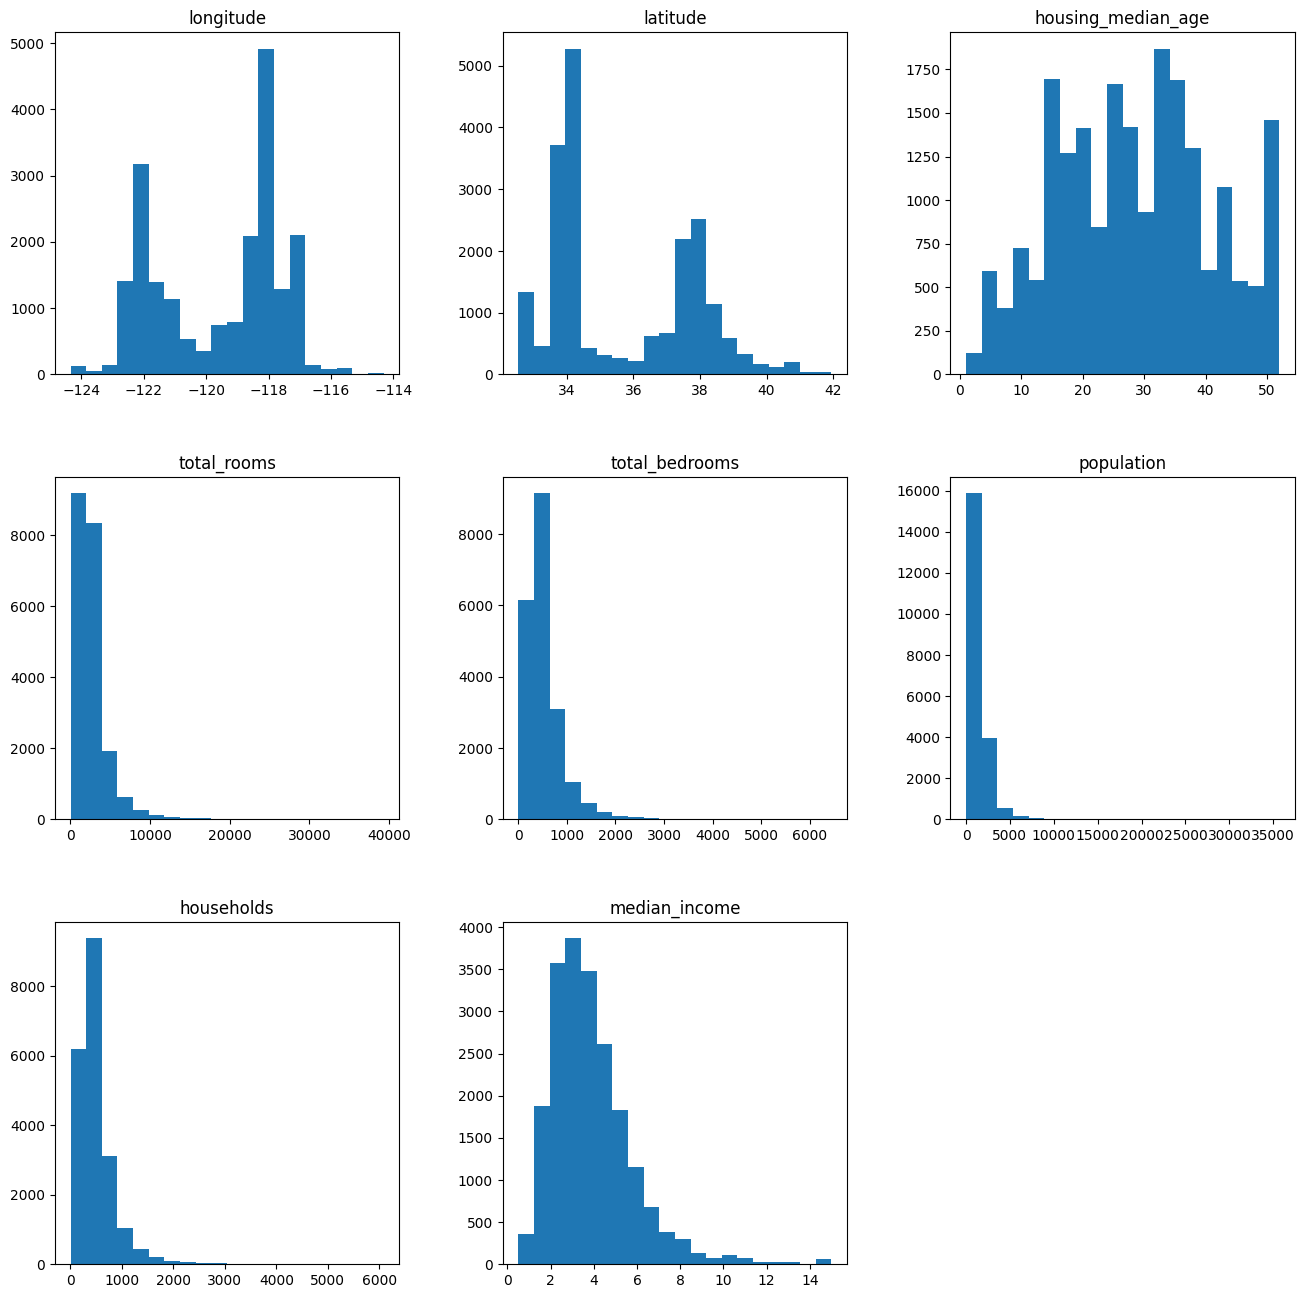

In [37]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

## Поиск выбросов с помощью box plot

Как строится box plot

Подробное объяснение

box - от 25% до 75% квантиля
линия в середине box - медиана
"усы"
Как строятся "усы" - вариантов масса

среднее +/- 3 сигма (стандартное отклонение)
min / max
median +/- 1.5*(q75 - q25),
...
*Интерквартильный размах = q75 - q25

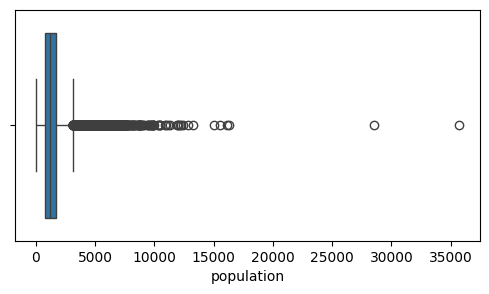

In [38]:
plt.figure(figsize=(6, 3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

# Анализ категориальных признаков

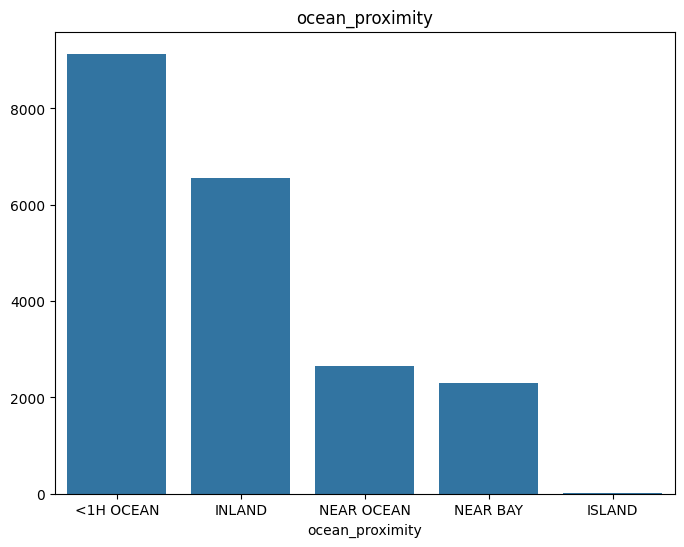

In [39]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
counts = df['INLAND'].value_counts()
    
plt.figure(figsize=(8, 6))    
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)
    
plt.show()

# Анализ взаимных распределений

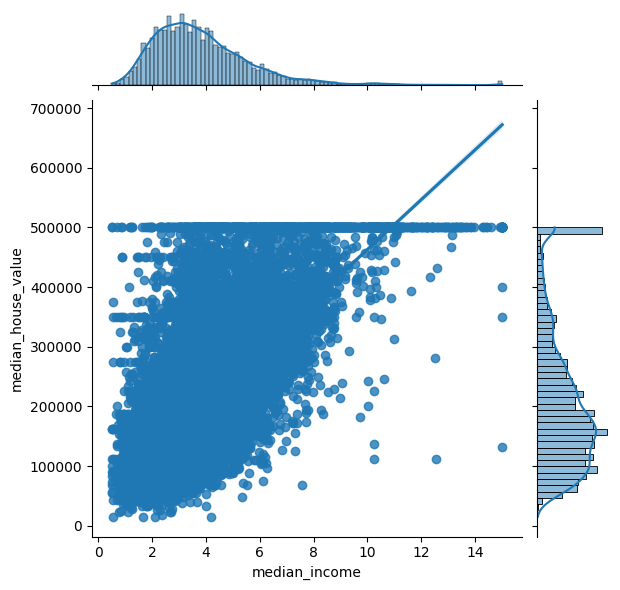

In [46]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg');

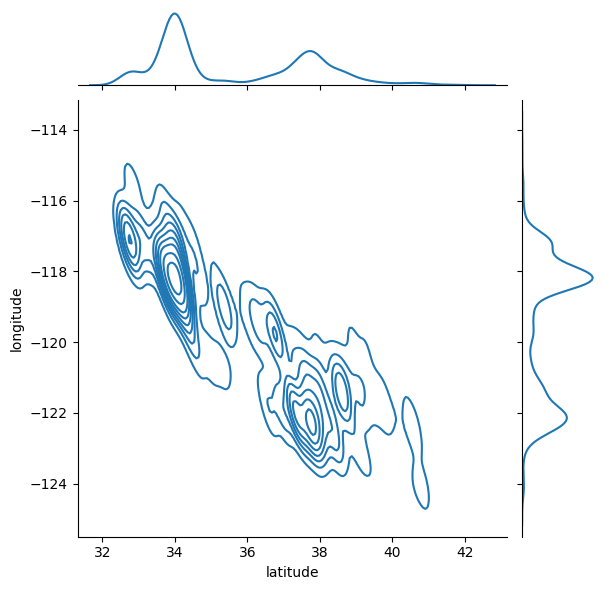

In [47]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

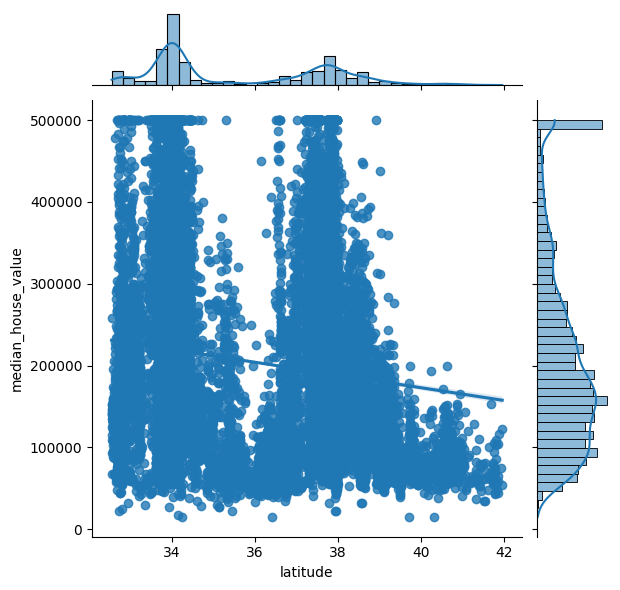

In [48]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

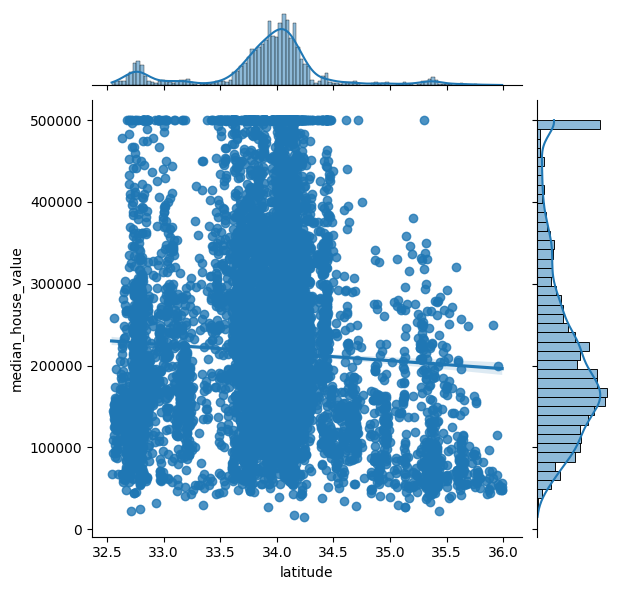

In [49]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

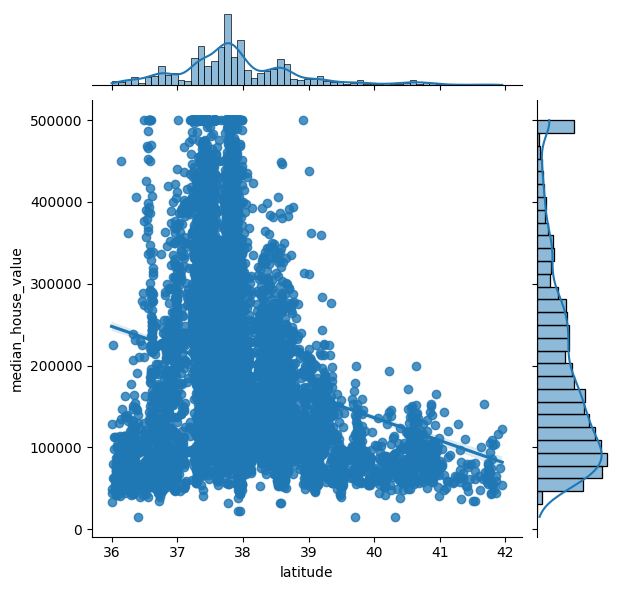

In [50]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x=df_cut['latitude'], y=df_cut['median_house_value'], kind='reg');

# Категориальные / бинарные признаки
## box plot

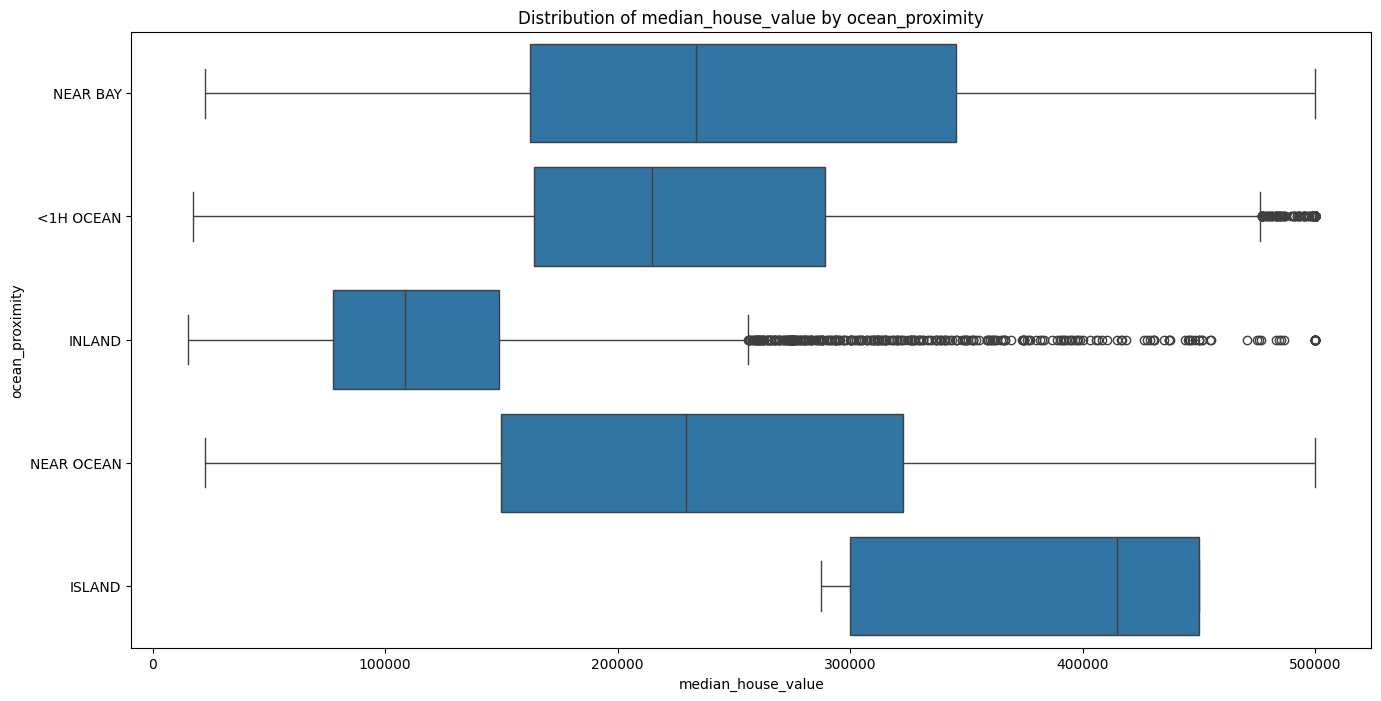

In [51]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['median_house_value'], y=df['ocean_proximity'], whis=1.5)

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity');